# Binomial ve Normal Dağılım

## Binomial Dağılım

* Binomial dağılım, sabit sayıda bağımsız deneyde başarı sayısını modelleyen kesikli bir olasılık dağılımıdır. Her deneyde başarı sabittir.

### Özellikler

* Parametreler: n (deneme sayısı) ve p (başarı olasılığı)
* Değer aralığı: 0,1,2,...,n (tam sayılar)
* Ortalama: μ = n*p
* Varyans: σ² = np(1-p)
* Şartlar: sabit n,bağımsız denemeler, sabit p

## Normal Dağılım

* Normal dağılım,sürekli değişkemler için kullanılan, çan şeklinde simetrik bir dağılımdır.Gerçek hayatta çok yaygın görülür

### Özellikleri

* Parametreleri: μ (ortalama) ve σ² (varyans)
* Değer aralığı: -∞ ile +∞ arasında (sürekli)
* Şekil: Çan şeklinde, simetrik
* Ortalama=Medyan=Mod= μ
* 68-95-99.7 kuralı: Verilerin %68'i μ±σ, %95'i μ±2σ, %99.7'si μ±3σ aralığında


## Temel Farklar

### Özellik

* Tip:Binomial kesikli--Normal sürekli
* Değer Aralığı:Binomial 0,1,2,..,n--Normal eksi sonsuz ile artı sonsuz arasında
* Şekil:Binomial çubuk grafik--Normal çan eğrisi
* Parametreler:Binomial n,p--Normal μ, σ²
* Kullanım:Binomial sayma problemleri--Normal ölçüm problemleri
* Simetri:Binomial p=0.5 ise simetrik--Normal her zaman simetrik

# E-Ticaret Projesi

* Bu proje binomial ve normal dağılımları gerçek hayat senaryolarında kullanır.Projeyi çalıştırdıktan sonra bir şirketin karar verme süreçlerinde binomial ve normal dağılımları nasıl kullandığını göreceksiniz.

## Proje Özellikleri

### 1-) Binomial Dağılım Uygulamaları

* E-mail kampanyası analizi: n-> email gönderimi,p-> dönüşüm oranı
* Satış Tahminleri: Belirli kampanya büyüklükleri için beklenen satış 
* Risk Analizi: Düşük performans olasılıkları

### 2-) Normal Dağılım Uygulamaları

* Günlük Satış Analizi: Ortalama ve standart sapma hesaplama
* Olasılık Hesaplamaları: 68-95-97.5 kuralı
* Trend Analizi: Mevsimler değişimler

### 3-) Gerçek Hayat Senaryoları

* Müşteri Segmentasyonu: VIP,Sadık,Orta,Düşük segmentler
* Kampanya Optimizasyonu: ROI hesaplamaları
* İş Zekası: Strateji önerileri

### 4-) Görselleştirmeler

* Dağılım Grafikleri
* Trend Analizleri
* Performans dashboardları
* Korelasyon analizleri


## Proje Çıktıları

### Analiz Sonuçları

* Email kampanyaları için beklenen satış sayıları
* Günlük satış olasılık aralıkları
* Müşteri segmentleri ve davranış kalıpları
* Risk değerlendirmeleri

### İş Değeri

* Kampanya bütçesi optimizasyonu
* Stok planlaması için satış tahminleri
* Müşteri deneyimi iyileştirmeleri
* Gelir tahminleri






In [73]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom,norm
import warnings
warnings.filterwarnings("ignore")

In [74]:
class ECommerceAnalyzer:
    """    
    E-Ticaret Müşteri Analizi Sınıfı

    Bu sınıf binomial ve normal dağılımları kullanarak
    e-ticaret müşteri davranışlarını analiz eder
    """

    def __init__(self):
        self.email_campaigns=[]
        self.daily_sales=[]
        self.customer_segments=[]
    
    def generate_sample_data(self,days=30):
        """    
        Örnek veri seti oluştur
        """
        np.random.seed(31)

        #Email kampanyası verileri(Binomial)
        campaign_data={
            "kampanya_id":range(1,21),
            "email_sayisi":np.random.randint(500,3000,20),
            "donusum_oranı":np.random.uniform(0.02,0.08,20),
            "satis_sayisi":[],
            "gelir":[]
        }

        for i in range(20):
            n=campaign_data["email_sayisi"][i]
            p=campaign_data["donusum_oranı"][i]

            satis=np.random.binomial(n,p)
            campaign_data["satis_sayisi"].append(satis)
            campaign_data["gelir"].append(satis*np.random.uniform(150,400))

        self.email_campaigns=pd.DataFrame(campaign_data)

        #Günlük satış verileri (Normal)

        dates=pd.date_range(start="2025-01-01",periods=days,freq="D")
        daily_sales_data={
            "tarih":dates,
            "satis_miktarı":np.random.normal(500,75,days),
            "gelir":np.random.normal(75000,12000,days),
            "musteri_sayisi":np.random.normal(200,30,days)
        }

        self.daily_sales=pd.DataFrame(daily_sales_data)

        print("Örnek veri seti oluşturuldu...")
        print(f"Email kampanyası: {len(self.email_campaigns)} kampanya")
        print(f"Günlük satış: {len(self.daily_sales)} gün ")


    def analyze_email_campaigns(self):
        """    
        Email kampanyalarını binomial ile analiz eder
        """
        print("*"*52)
        print("EMAIL KAMPANYASI ANALİZİ(Binomial Dağılım)")
        print("*"*52)

        #Temel istatistikler

        total_emails=self.email_campaigns["email_sayisi"].sum()
        total_sales=self.email_campaigns["satis_sayisi"].sum()
        avg_conversion=self.email_campaigns["donusum_oranı"].mean()

        print(f"Toplam Email:{total_emails:,}")
        print(f"Toplam Satış: {total_sales:,}")
        print(f"Ortalama Dönüşüm: {avg_conversion:.3f}")

        # En iyi kampanya

        best_campaing=self.email_campaigns.loc[self.email_campaigns["gelir"].idxmax()]
        print(f"En İyi Kampanya")
        print(f"Kampanya ID: {int(best_campaing["kampanya_id"])}")
        print(f"Dönüşüm Oranı: {best_campaing["donusum_oranı"]:.3f}")
        print(f"Gelir: {best_campaing["gelir"]:,.0f} TL")

        #Binomial dağılım tahminleri
        print(f"\nYeni Kampanya Tahminleri:")

        scenarios=[(1000,0.03,"Düşük Dönüşüm"),
                   (1000,0.05,"Orta Dönüşüm"),
                   (1000,0.07,"Yüksek Dönüşüm")]
        
        for n,p,desc in scenarios:
            expected_sales=n*p
            std_dev=np.sqrt(n*p*(1-p))

            # %95 güven aralığı

            lower_bound=expected_sales - 1.96*std_dev
            upper_bound=expected_sales + 1.96*std_dev

            print(f"\n{desc} = (n={n}, p={p}):")
            print(f"Beklenen Satış: {expected_sales:.1f}")
            print(f"%95 Güven Aralığı: [{lower_bound:.1f}, {upper_bound:.1f}]")

            # Belirli satış sayıları için olasılıklar

            prob_0=binom.pmf(0,n,p)
            prob_expected=binom.pmf(int(expected_sales),n,p)
            prob_double=binom.pmf(int(2*expected_sales),n,p)

            print(f"P(0 satış)= {prob_0:.4f}")
            print(f"P({int(expected_sales)} satış) = {prob_expected:.4f}")
            print(f"P({int(2*expected_sales)} satış) = {prob_double:.4f}")


    def analyze_daily_sales(self):
        """    
        Günlük satışları normal dağılım ile analiz eder
        """

        print("\nGÜNLÜK SATIŞ ANALİZİ (Normal Dağılım)")
        print("="*50)

        #Temel istatistikler
        sales_mean=self.daily_sales["satis_miktarı"].mean()
        sales_std=self.daily_sales["satis_miktarı"].std()
        revenue_mean=self.daily_sales["gelir"].mean()
        revenue_std=self.daily_sales["gelir"].std()

        print(f"Ortalama Günlük Satış: {sales_mean:.1f} ürün")
        print(f"Standart Sapma: {sales_std:.1f} ürün")
        print(f"Ortalama Günlük Gelir: {revenue_mean:.0f} TL")
        print(f"Gelir Standart Sapma: {revenue_std:.0f} TL")

        #Normal dağılım analizi
        print(f"\nSatış Olasılıkları")

        # 68-95-99.7 kuralı
        range_68_lower=sales_mean-sales_std
        range_68_upper=sales_mean+sales_std
        range_95_lower=sales_mean - sales_std*2
        range_95_upper=sales_mean + sales_std*2

        print(f"%68 olasılıkla: {range_68_lower:.0f} - {range_68_upper:.0f} ürün")
        print(f"%95 olasılıkla: {range_95_lower:.0f} - {range_95_upper:.0f} ürün")


        #Özel Durumlar
        scenarios=[
            (400,"Düşük satış günü"),
            (600,"Yüksek satış günü"),
            (700,"Çok yüksek satış günü")
        ]

        print(f"\nÖzel Durumlar...")
        for threshold,desc in scenarios:
            prob=1- norm.cdf(threshold,sales_mean,sales_std)
            print(f"{desc} (>{threshold} ürün): %{prob*100:.1f}")


        #Risk analizi
        print("\nRisk Analizi:")
        low_sales_prob=norm.cdf(350,sales_mean,sales_std)
        print(f"Düşük satış riski (<350 ürün): %{low_sales_prob*100:.1f}")

        very_low_sales_prob=norm.cdf(300,sales_mean,sales_std)
        print(f"Çok düşük satış riski (<300 ürün): %{very_low_sales_prob*100:.1f}")

    def customer_segmentation(self):
        """    
        Müşteri segmentasyonu yapar
        """
        print("\nMÜŞTERİ SEGMENTASYONU")
        print("="*50)

        #Müşteri davranış simülasyonu
        np.random.seed(42)
        n_customers=1000

        #Müşteri özellikleri
        customer_Data={
            "musteri_id":range(1,n_customers+1),
            "yas":np.random.normal(35,12,n_customers),
            "aylik_harcama":np.random.normal(800,200,n_customers),
            "satin_alma_sikligi":np.random.poisson(3,n_customers),
            "email_acma_orani":np.random.beta(2,5,n_customers)
        }

        customers_df=pd.DataFrame(customer_Data)

        #Segmentasyon

        def segment_customer(row):
            if row["aylik_harcama"]>1000 and row["satin_alma_sikligi"]>4:
                return "VIP"
            elif row["aylik_harcama"]>600 and row["satin_alma_sikligi"]>2:
                return "Sadık"
            elif row["aylik_harcama"]>400:
                return "Orta"
            else:
                return "Düşük"
            
        customers_df["segment"]=customers_df.apply(segment_customer,axis=1)
        #Segment analizi
        
        segment_analysis=customers_df.groupby("segment").agg({
            "aylik_harcama":["mean","std","count"],
            "email_acma_orani":"mean",
            "satin_alma_sikligi":"mean"
        }).round(2)

        print("Müşteri Segmentleri")
        for segment in ["VIP","Sadık","Orta","Düşük"]:
            if segment in segment_analysis.index:
                count=segment_analysis.loc[segment,("aylik_harcama","count")]
                avg_spending=segment_analysis.loc[segment,("aylik_harcama","mean")]
                email_rate=segment_analysis.loc[segment,("email_acma_orani","mean")]

                print(f"\n{segment} Segment")
                print(f"Müşteri Sayısı: {count}")
                print(f"Ortalama Harcama: {avg_spending:.0f} TL")
                print(f"Email Açma Oranı: %{email_rate*100:.1f}")


        # Segmente göre kampanya önerileri
        print(f"\nKampanya Önerileri:")

        vip_count=len(customers_df[customers_df["segment"]=="VIP"])
        loyal_count=len(customers_df[customers_df["segment"]=="Sadık"])

        # VIP müşteriler için binomial analiz
        vip_conversion=0.15 # %15 dönüşüm
        expected_vip_sales= vip_count* vip_conversion

        print(f"VIP Müşteriler ({vip_count} kişi):")
        print(f"Özel Kampanya Dönüşüm Oranı: %{vip_conversion*100}")
        print(f"Beklenen Satış: {expected_vip_sales:.0f}")

        # Sadık müşteriler için normal dağılım
        loyal_avg_response=0.08
        loyal_std=0.02

        print(f"Sadık Müşteriler ({loyal_count} kişi):")
        print(f"Ortalama Dönüşüm %{loyal_avg_response*100}")
        print(f"Standart Sapma: %{loyal_std*100}")

        return customers_df
    
    def create_visualizations(self):
        """
        Görselleştirmeleri oluşturur
        """
        print("\nGÖRSELLEŞTİRMELER OLUŞTURULUYOR")
        print("="*50)

        fig,axes=plt.subplots(2,3,figsize=(18,12))
        fig.suptitle("E-Ticaret Müşteri Analizi Dashboard",fontsize=16,fontweight="bold")

        # 1-) Email Kampanyası Dağılımı (Binomial)
        ax1=axes[0,0]
        n,p=1000,0.05
        x=np.arange(0,100)
        y=binom.pmf(x,n,p)
        ax1.bar(x,y,alpha=0.7,color="skyblue",edgecolor="navy")
        ax1.axvline(n*p,color="red",linestyle="--",label=f"Beklenen: {n*p}")
        ax1.set_title("Email Kampanyası - Binomial Dağılım\n(n=100, p=0.05)")
        ax1.set_xlabel("Satış Sayısı")
        ax1.set_ylabel("Olasılık")
        ax1.legend()
        ax1.grid(True,alpha=0.3)

        # 2-) Günlük Satış Dağılımı(Normal)
        ax2=axes[0,1]
        x=np.linspace(250,750,100)
        y=norm.pdf(x,500,75)
        ax2.plot(x,y,color="orange",linewidth=2)
        ax2.fill_between(x,y,alpha=0.3,color="orange")
        ax2.axvline(500,color="red",linestyle="--",label="Ortalama: 500")
        ax2.set_title("Günlük Satış- Normal Dağılım\n(μ=500, σ=75)")
        ax2.set_xlabel("Satış Miktarı")
        ax2.set_ylabel("Yoğunluk")
        ax2.legend()
        ax2.grid(True,alpha=0.3)

        # 3-) Kampanya performansı
        ax3 = axes[0, 2]
        campaign_perf = self.email_campaigns.nlargest(10, 'gelir')
        bars = ax3.bar(range(len(campaign_perf)), campaign_perf['gelir']/1000, 
                      color='lightgreen', edgecolor='darkgreen')
        ax3.set_title('En İyi 10 Kampanya Geliri')
        ax3.set_xlabel('Kampanya Sırası')
        ax3.set_ylabel('Gelir (1000 TL)')
        ax3.grid(True, alpha=0.3)
        
        # Değerleri çubuklara yazdır
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}K', ha='center', va='bottom')
            

        # 4-) Günlük Satış Trendi
        ax4=axes[1,0]
        ax4.plot(self.daily_sales["tarih"],self.daily_sales["satis_miktarı"],
                 color="purple",linewidth=2,marker="o",markersize=4)
        ax4.axhline(self.daily_sales["satis_miktarı"].mean(),
                    color="red",linestyle="--",label="Ortalama")
        ax4.set_title("Günlük Satış Trendi")
        ax4.set_xlabel("Tarih")
        ax4.set_ylabel("Satış Miktarı")
        ax4.legend()
        ax4.grid(True,alpha=0.3)
        plt.setp(ax4.xaxis.get_majorticklabels(),rotation=45)

        # 5-) Dönüşüm oranları dağılımı
        ax5 = axes[1, 1]
        ax5.hist(self.email_campaigns['donusum_oranı'], bins=10, 
                color='lightcoral', edgecolor='darkred', alpha=0.7)
        ax5.axvline(self.email_campaigns['donusum_oranı'].mean(), 
                   color='red', linestyle='--', label='Ortalama')
        ax5.set_title('Dönüşüm Oranları Dağılımı')
        ax5.set_xlabel('Dönüşüm Oranı')
        ax5.set_ylabel('Frekans')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # 6-) Gelir vs Email sayısı
        ax6 = axes[1, 2]
        scatter = ax6.scatter(self.email_campaigns['email_sayisi'], 
                            self.email_campaigns['gelir']/1000,
                            c=self.email_campaigns['donusum_oranı'], 
                            cmap='viridis', alpha=0.7, s=100)
        ax6.set_title('Email Sayısı vs Gelir')
        ax6.set_xlabel('Email Sayısı')
        ax6.set_ylabel('Gelir (1000 TL)')
        plt.colorbar(scatter, ax=ax6, label='Dönüşüm Oranı')
        ax6.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Görselleştirmeler tamamlandı!")

    def generate_business_insights(self):
        """    
        İş zekası ve öneriler üretir
        """

        print("\nİŞ ZEKASI VE ÖNERİLER")
        print("="*50)

        # Email Kampanyası Öngürüleri
        avg_conversion=self.email_campaigns["donusum_oranı"].mean()
        std_conversion=self.email_campaigns["donusum_oranı"].std()

        print("📧 Email Kampanyası Önerileri:")
        print(f"Ortalama dönüşüm oranı: %{avg_conversion*100:.2f}")
        print(f"Standart sapma: %{std_conversion*100:.2f}")

        #Optimum kampanya büyüklüğü
        optimal_size=1500
        expected_sales=optimal_size*avg_conversion
        roi_estimate=expected_sales*250 #Ortalama ürün fiyatı

        print(f"Önerilen kampanya büyüklüğü: {optimal_size} email")
        print(f"Beklenen satış: {expected_sales:.0f} ürün")
        print(f"Tahmini ROI: {roi_estimate:,.0f} TL")

        #Günlük satış öngörüleri
        sales_mean=self.daily_sales["satis_miktarı"].mean()
        sales_std=self.daily_sales["satis_miktarı"].std()

        print(f"\nGünlük Satış Öngörüleri:")
        print(f"Yarın %80 olasılıkla satış: {sales_mean-1.28*sales_std:.0f} - {sales_mean+1.28*sales_std:.0f} ürün")
        print(f"Haftalık toplam satış beklentisi: {sales_mean*7:.0f} ürün")
        
        # Risk değerlendirmesi
        low_sales_risk = norm.cdf(350, sales_mean, sales_std)
        high_sales_opportunity = 1 - norm.cdf(650, sales_mean, sales_std)
        
        print(f"\nRisk Değerlendirmesi:")
        print(f"Düşük satış riski: %{low_sales_risk*100:.1f}")
        print(f"Yüksek satış fırsatı: %{high_sales_opportunity*100:.1f}")



        

    
    













Örnek veri seti oluşturuldu...
Email kampanyası: 20 kampanya
Günlük satış: 30 gün 
****************************************************
EMAIL KAMPANYASI ANALİZİ(Binomial Dağılım)
****************************************************
Toplam Email:36,483
Toplam Satış: 1,711
Ortalama Dönüşüm: 0.046
En İyi Kampanya
Kampanya ID: 2
Dönüşüm Oranı: 0.077
Gelir: 70,432 TL

Yeni Kampanya Tahminleri:

Düşük Dönüşüm = (n=1000, p=0.03):
Beklenen Satış: 30.0
%95 Güven Aralığı: [19.4, 40.6]
P(0 satış)= 0.0000
P(30 satış) = 0.0737
P(60 satış) = 0.0000

Orta Dönüşüm = (n=1000, p=0.05):
Beklenen Satış: 50.0
%95 Güven Aralığı: [36.5, 63.5]
P(0 satış)= 0.0000
P(50 satış) = 0.0578
P(100 satış) = 0.0000

Yüksek Dönüşüm = (n=1000, p=0.07):
Beklenen Satış: 70.0
%95 Güven Aralığı: [54.2, 85.8]
P(0 satış)= 0.0000
P(70 satış) = 0.0494
P(140 satış) = 0.0000

GÜNLÜK SATIŞ ANALİZİ (Normal Dağılım)
Ortalama Günlük Satış: 483.9 ürün
Standart Sapma: 68.1 ürün
Ortalama Günlük Gelir: 73564 TL
Gelir Standart Sapma: 12322 

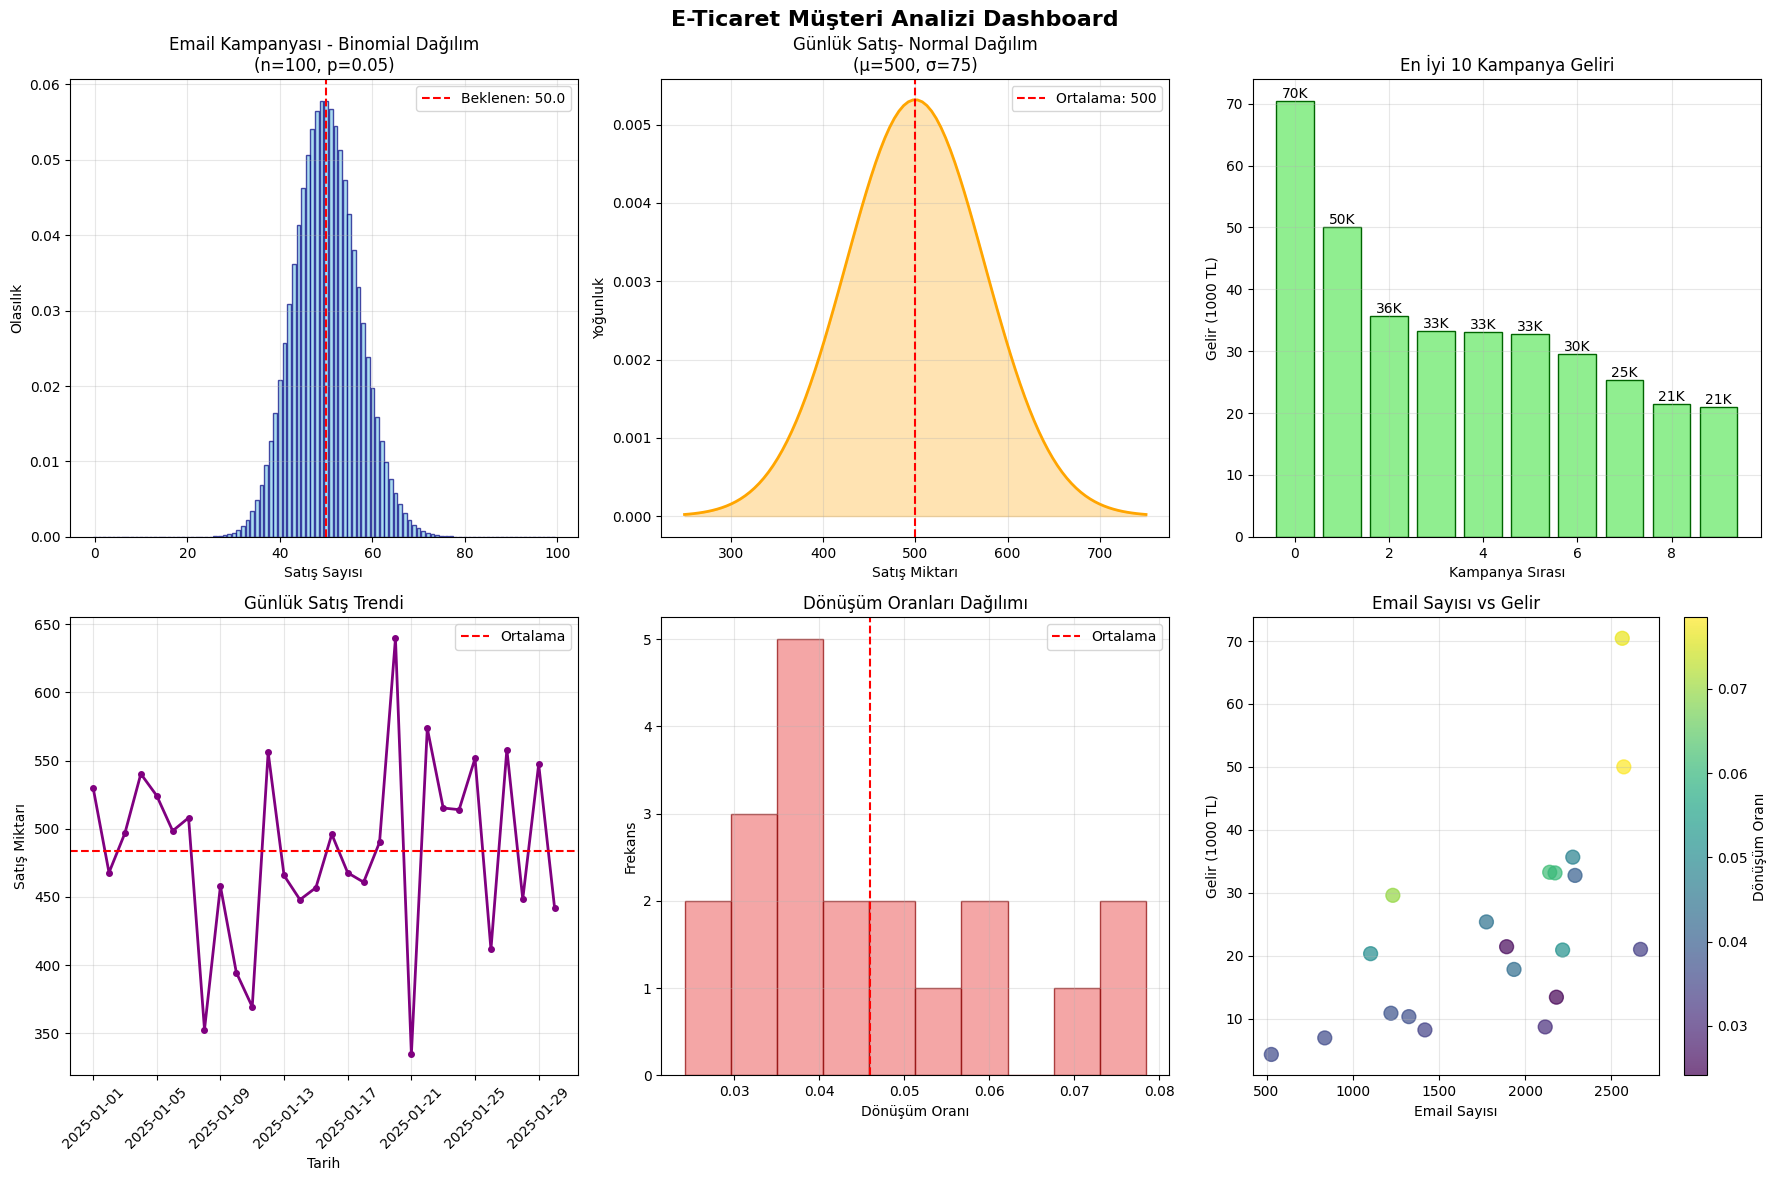

✅ Görselleştirmeler tamamlandı!

İŞ ZEKASI VE ÖNERİLER
📧 Email Kampanyası Önerileri:
Ortalama dönüşüm oranı: %4.60
Standart sapma: %1.60
Önerilen kampanya büyüklüğü: 1500 email
Beklenen satış: 69 ürün
Tahmini ROI: 17,248 TL

Günlük Satış Öngörüleri:
Yarın %80 olasılıkla satış: 397 - 571 ürün
Haftalık toplam satış beklentisi: 3387 ürün

Risk Değerlendirmesi:
Düşük satış riski: %2.5
Yüksek satış fırsatı: %0.7


In [75]:

x = ECommerceAnalyzer()
x.generate_sample_data()  # Önce verileri oluştur
x.analyze_email_campaigns()  # Daha sonra analiz yap
x.analyze_daily_sales()
x.customer_segmentation()
x.create_visualizations()
x.generate_business_insights()

